In [1]:
import uproot4
from matplotlib import pyplot as plt
from hist import Hist
import hist
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd
import numpy as np

### Reading the root file

In [2]:
file=uproot4.open("testpi.root")

tree= file["events"]

entries=tree.num_entries

print(f"Total entries is {entries}")

Total entries is 5000


In [3]:
pos_x= tree['ForwardTRDHits/ForwardTRDHits.position.x'].array()
pos_y= tree['ForwardTRDHits/ForwardTRDHits.position.y'].array()
pos_z= tree['ForwardTRDHits/ForwardTRDHits.position.z'].array()
ene= tree['ForwardTRDHits/ForwardTRDHits.energyDeposit'].array()*(10**6)
length=tree['ForwardTRDHits/ForwardTRDHits.length'].array()


flat_posX=ak.flatten(pos_x)
flat_posY=ak.flatten(pos_y)
flat_posZ=ak.flatten(pos_z)
flat_ene=ak.flatten(ene) #to keV
flat_length=ak.flatten(length)

### Reading root file for e-

In [5]:
file=uproot4.open("testelec.root")

tree= file["events"]

entries=tree.num_entries

print(f"Total entries is {entries}")

Total entries is 5000


In [6]:
# pos_x= tree['ForwardTRDHits/ForwardTRDHits.position.x'].array()
# pos_y= tree['ForwardTRDHits/ForwardTRDHits.position.y'].array()
pos_zE= tree['ForwardTRDHits/ForwardTRDHits.position.z'].array()
ene_E= tree['ForwardTRDHits/ForwardTRDHits.energyDeposit'].array()*(10**6)
length_E=tree['ForwardTRDHits/ForwardTRDHits.length'].array()


# flat_posX=ak.flatten(pos_x)
# flat_posY=ak.flatten(pos_y)
flat_posZE=ak.flatten(pos_zE)
flat_eneE=ak.flatten(ene_E) #to keV
flat_lengthE=ak.flatten(length_E)


In [7]:
print(f"The flattened shape for pions is {len(flat_posZ)}")
print(f"The flattened shape for electrons is {len(flat_posZE)}")

The flattened shape for pions is 20253
The flattened shape for electrons is 16032


In [8]:
max(flat_ene)

2047.3853492987562

### Energy deposit for Pion & electron 

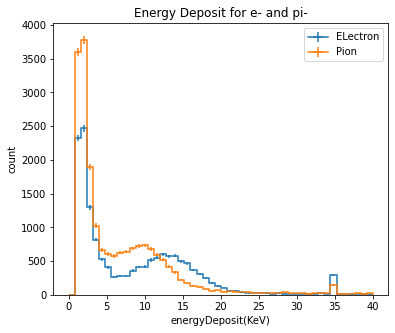

In [9]:
#energyDeposit of electron vs pion

plt.figure(figsize=(6,5))
h_pion = Hist(
    hist.axis.Regular(50, 0, 40, name="energyDeposit(KeV)", label="energyDeposit(KeV)", flow=False),
)
h_pion.fill(flat_ene)


h_electron = Hist(
    hist.axis.Regular(50, 0, 40, name="energyDeposit(KeV)", label="energyDeposit(KeV)", flow=False),
)
h_electron.fill(flat_eneE)

s=hist.Stack.from_dict({"ELectron": h_electron, "Pion": h_pion})
s.plot()
plt.ylabel("count")
plt.legend()
plt.title("Energy Deposit for e- and pi-")
plt.show()


### Randomly sampling pions

In [10]:
#randomly sampling
data={
    "position Z pion":flat_posZ,
    "energyDeposit_pion":flat_ene
}
df_pion=pd.DataFrame(data=data)
df_pion=df_pion.sample(n=len(flat_eneE),random_state=32)

### Energy deposit of electrons and pions

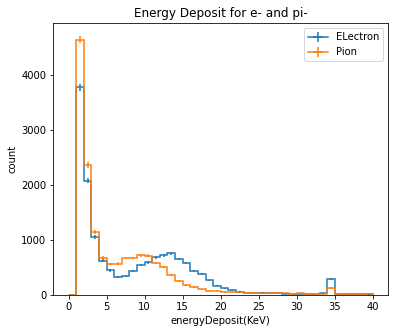

In [11]:
#energyDeposit of electron and pion

plt.figure(figsize=(6,5))
h_pion = Hist(
    hist.axis.Regular(40, 0, 40, name="energyDeposit(KeV)", label="energyDeposit(KeV)", flow=False),
)
h_pion.fill(df_pion['energyDeposit_pion'])


h_electron = Hist(
    hist.axis.Regular(40, 0, 40, name="energyDeposit(KeV)", label="energyDeposit(KeV)", flow=False),
)
h_electron.fill(flat_eneE)

s=hist.Stack.from_dict({"ELectron": h_electron, "Pion": h_pion})
s.plot()
plt.ylabel("count")
plt.legend()
plt.title("Energy Deposit for e- and pi-")
plt.show()


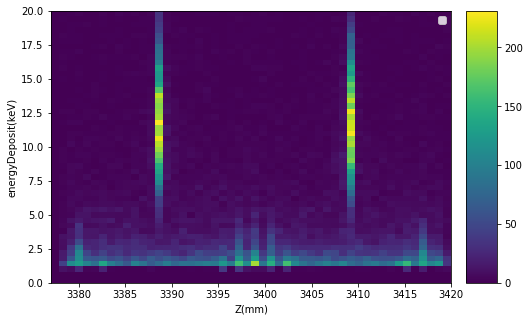

In [14]:
# energyDeposit vs Z (for electron and pion)
plt.figure(figsize=(8,5))
h2 = Hist.new.Reg(50,3377, 3420, name="x",label="Z(mm)",flow=False).Reg(
    50, 0, 20, name="y",label="energyDeposit(keV)",flow=False).Double()

h2.fill(x=df_pion['position Z pion'], y=df_pion['energyDeposit_pion'])
h2.fill(x=flat_posZE, y=flat_eneE)
h2.plot()
plt.legend(['pi-','e-'])
plt.show()

### Length (Electron & Pion)

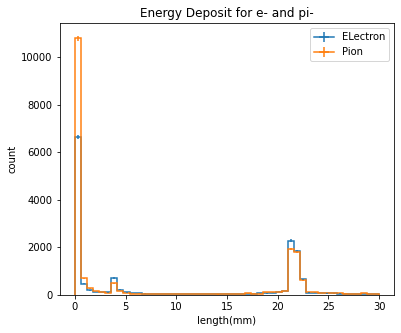

In [15]:
#Length of electron vs pion

plt.figure(figsize=(6,5))
h_pion = Hist(
    hist.axis.Regular(50, 0, 30, name="length(mm)", label="length(mm)", flow=False),
)
h_pion.fill(flat_length)


h_electron = Hist(
    hist.axis.Regular(50, 0, 30, name="length(mm)", label="length(mm)", flow=False),
)
h_electron.fill(flat_lengthE)

s=hist.Stack.from_dict({"ELectron": h_electron, "Pion": h_pion})
s.plot()
plt.ylabel("count")
plt.legend()
plt.title("Energy Deposit for e- and pi-")
plt.show()


### Comparing electrons and pions

In [16]:
data={
    "energyDeposit_elec":flat_eneE
}
df=pd.DataFrame(data=data)

df["energyDeposit_pion"]=df_pion["energyDeposit_pion"]

In [17]:
df.describe()

,energyDeposit_elec,energyDeposit_pion
count,16032.000000,12718.000000
mean,9.480423,8.418027
std,11.333155,20.293628
min,1.000439,1.000540
25%,2.079357,1.832386
50%,6.132639,3.732005
75%,13.529284,9.970883
max,173.167537,1241.174635
